<a href="https://colab.research.google.com/github/sangwooan/ML_PLAC/blob/main/RNN%EA%B3%BC_LSTM%EC%9D%98_%EC%B0%A8%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sin 곡선 예측 RNN 모델 사용

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,LSTM,SimpleRNN

time step만큼 시퀀스 데이터 분리

In [2]:
def split_sequence(sequence,step):
  x,y=list(),list()

  for i in range(len(sequence)):
    end_idx=i+step
    if end_idx > len(sequence)-1:
      break

    seq_x,seq_y=sequence[i:end_idx],sequence[end_idx]
    x.append(seq_x)
    y.append(seq_y)

  return np.array(x), np.array(y)

sin 함수 학습 데이터

In [3]:
x=[i for i in np.arange(start=-10,stop=10,step=0.1)]
train_y=[np.sin(i) for i in x]

하이퍼파라미터

In [4]:
n_timesteps=15
n_feature=1

시퀀스 나누기

In [5]:
train_x,train_y=split_sequence(train_y,step=n_timesteps)
train_x_lstm=train_x
train_y_lstm=train_y
print('shape x: {} / y: {}'.format(train_x.shape,train_y.shape))

shape x: (185, 15) / y: (185,)


RNN 입력 벡터 크기를 맞추기 위해 벡터 차원 크기 변경

reshape from [samples, timesteps] into [samples, timesteps, features]

In [6]:
train_x=train_x.reshape(train_x.shape[0],train_x.shape[1],n_feature)
print('train_x.shape= {}'.format(train_x.shape))
print('train_y.shape= {}'.format(train_y.shape))

train_x.shape= (185, 15, 1)
train_y.shape= (185,)


rnn 모델 정의

In [7]:
model= Sequential()
model.add(SimpleRNN(units=10,return_sequences=False,input_shape=(n_timesteps,n_feature)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

모델 학습

In [8]:
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(
    monitor='loss',
    patience=5,
    mode='auto'
)
history=model.fit(train_x,train_y,epochs=1000,callbacks=[early_stopping])

Epoch 1/1000
6/6 [==============================] - 2s 9ms/step - loss: 0.1652
Epoch 2/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.1143
Epoch 3/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.0768
Epoch 4/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.0501
Epoch 5/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0315
Epoch 6/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.0204
Epoch 7/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.0142
Epoch 8/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.0110
Epoch 9/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.0095
Epoch 10/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.0086
Epoch 11/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0078
Epoch 12/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0071
Epoch 13/1000
6/6 [===========================

loss 그래프 생성

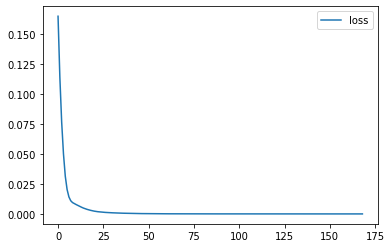

In [9]:
plt.plot(history.history['loss'],label='loss')
plt.legend(loc='upper right')
plt.show()

테스트 데이터셋 생성

In [10]:
test_x=np.arange(10,20,0.1)
calc_y=np.cos(test_x)

rnn 모델 예측 및 로그 저장

In [11]:
test_y=calc_y[:n_timesteps]
for i in range(len(test_x)-n_timesteps):
  net_input=test_y[i:i+n_timesteps]
  net_input=net_input.reshape((1,n_timesteps,n_feature))
  train_y=model.predict(net_input,verbose=0)
  print(test_y.shape,train_y.shape,i,i+n_timesteps)
  test_y=np.append(test_y,train_y)

(15,) (1, 1) 0 15
(16,) (1, 1) 1 16
(17,) (1, 1) 2 17
(18,) (1, 1) 3 18
(19,) (1, 1) 4 19
(20,) (1, 1) 5 20
(21,) (1, 1) 6 21
(22,) (1, 1) 7 22
(23,) (1, 1) 8 23
(24,) (1, 1) 9 24
(25,) (1, 1) 10 25
(26,) (1, 1) 11 26
(27,) (1, 1) 12 27
(28,) (1, 1) 13 28
(29,) (1, 1) 14 29
(30,) (1, 1) 15 30
(31,) (1, 1) 16 31
(32,) (1, 1) 17 32
(33,) (1, 1) 18 33
(34,) (1, 1) 19 34
(35,) (1, 1) 20 35
(36,) (1, 1) 21 36
(37,) (1, 1) 22 37
(38,) (1, 1) 23 38
(39,) (1, 1) 24 39
(40,) (1, 1) 25 40
(41,) (1, 1) 26 41
(42,) (1, 1) 27 42
(43,) (1, 1) 28 43
(44,) (1, 1) 29 44
(45,) (1, 1) 30 45
(46,) (1, 1) 31 46
(47,) (1, 1) 32 47
(48,) (1, 1) 33 48
(49,) (1, 1) 34 49
(50,) (1, 1) 35 50
(51,) (1, 1) 36 51
(52,) (1, 1) 37 52
(53,) (1, 1) 38 53
(54,) (1, 1) 39 54
(55,) (1, 1) 40 55
(56,) (1, 1) 41 56
(57,) (1, 1) 42 57
(58,) (1, 1) 43 58
(59,) (1, 1) 44 59
(60,) (1, 1) 45 60
(61,) (1, 1) 46 61
(62,) (1, 1) 47 62
(63,) (1, 1) 48 63
(64,) (1, 1) 49 64
(65,) (1, 1) 50 65
(66,) (1, 1) 51 66
(67,) (1, 1) 52 67
(68

예측 결과 그래프 그리기

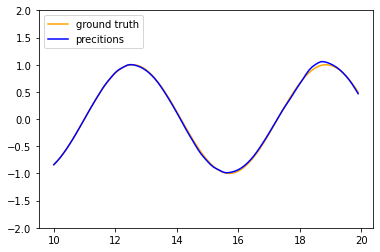

In [12]:
plt.plot(test_x,calc_y,label='ground truth',color='orange')
plt.plot(test_x,test_y,label='precitions',color='blue')
plt.legend(loc='upper left')
plt.ylim(-2,2)
plt.show()

# LSTM 사용하기


RNN 모델은 입력 시퀀스의 시점(time step)이 길어질수록 앞쪽의 데이터가 뒤쪽으로 잘 전달되지 않아 학습 능력이 떨어진다.

또한 RNN을 다층 구조로 쌓으면 입력과 출력 데이터 사이의 연관 관계가 줄어들어 장기 의존성 문제가 생긴다.

문제를 보완하기 위해 기존 RNN을 LSTM으로 변형했다.

LSTM 모델 정의

In [13]:
model_lstm=Sequential()
model_lstm.add(LSTM(
    units=10,
    return_sequences=False,
    input_shape=(n_timesteps,n_feature)
))
model_lstm.add(Dense(1))
model_lstm.compile(
    optimizer='adam',
    loss='mse'
)

모델 학습

In [14]:
print('shape x: {} / y: {}'.format(train_x_lstm.shape,train_y_lstm.shape))

shape x: (185, 15) / y: (185,)


In [15]:
train_x_lstm=train_x_lstm.reshape(
    train_x_lstm.shape[0],
    train_x_lstm.shape[1],
    n_feature
)

In [16]:
np.random.seed(0)
history_lstm=model_lstm.fit(
    train_x_lstm,train_y_lstm,epochs=1000,callbacks=[early_stopping]
)

Epoch 1/1000
6/6 [==============================] - 2s 9ms/step - loss: 0.4806
Epoch 2/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.4400
Epoch 3/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.4021
Epoch 4/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.3677
Epoch 5/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.3361
Epoch 6/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.3061
Epoch 7/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2800
Epoch 8/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2557
Epoch 9/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2326
Epoch 10/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.2122
Epoch 11/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.1934
Epoch 12/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.1789
Epoch 13/1000
6/6 [==============================

loss 그래프 생성

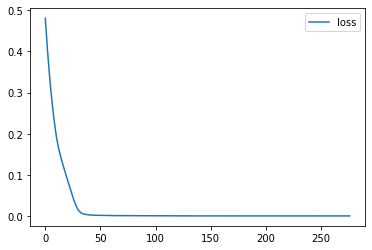

In [17]:
plt.plot(history_lstm.history['loss'],label='loss')
plt.legend(loc='upper right')
plt.show()

테스트 데이터셋 생성

In [18]:
test_x=np.arange(10,20,0.1)
calc_y=np.cos(test_x)

lstm 모델 예측 및 로그 저장

In [19]:
test_y=calc_y[:n_timesteps]
for i in range(len(test_x)-n_timesteps):
  net_input=test_y[i:i+n_timesteps]
  net_input=net_input.reshape((1,n_timesteps,n_feature))
  train_y=model.predict(net_input,verbose=0)
  print(test_y.shape,train_y.shape,i,i+n_timesteps)
  test_y=np.append(test_y,train_y)

(15,) (1, 1) 0 15
(16,) (1, 1) 1 16
(17,) (1, 1) 2 17
(18,) (1, 1) 3 18
(19,) (1, 1) 4 19
(20,) (1, 1) 5 20
(21,) (1, 1) 6 21
(22,) (1, 1) 7 22
(23,) (1, 1) 8 23
(24,) (1, 1) 9 24
(25,) (1, 1) 10 25
(26,) (1, 1) 11 26
(27,) (1, 1) 12 27
(28,) (1, 1) 13 28
(29,) (1, 1) 14 29
(30,) (1, 1) 15 30
(31,) (1, 1) 16 31
(32,) (1, 1) 17 32
(33,) (1, 1) 18 33
(34,) (1, 1) 19 34
(35,) (1, 1) 20 35
(36,) (1, 1) 21 36
(37,) (1, 1) 22 37
(38,) (1, 1) 23 38
(39,) (1, 1) 24 39
(40,) (1, 1) 25 40
(41,) (1, 1) 26 41
(42,) (1, 1) 27 42
(43,) (1, 1) 28 43
(44,) (1, 1) 29 44
(45,) (1, 1) 30 45
(46,) (1, 1) 31 46
(47,) (1, 1) 32 47
(48,) (1, 1) 33 48
(49,) (1, 1) 34 49
(50,) (1, 1) 35 50
(51,) (1, 1) 36 51
(52,) (1, 1) 37 52
(53,) (1, 1) 38 53
(54,) (1, 1) 39 54
(55,) (1, 1) 40 55
(56,) (1, 1) 41 56
(57,) (1, 1) 42 57
(58,) (1, 1) 43 58
(59,) (1, 1) 44 59
(60,) (1, 1) 45 60
(61,) (1, 1) 46 61
(62,) (1, 1) 47 62
(63,) (1, 1) 48 63
(64,) (1, 1) 49 64
(65,) (1, 1) 50 65
(66,) (1, 1) 51 66
(67,) (1, 1) 52 67
(68

예측 결과 그래프 그리기

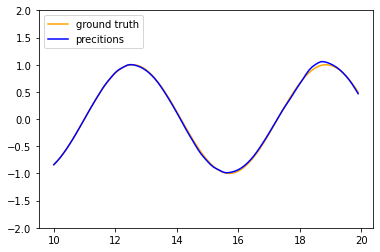

In [20]:
plt.plot(test_x,calc_y,label='ground truth',color='orange')
plt.plot(test_x,test_y,label='precitions',color='blue')
plt.legend(loc='upper left')
plt.ylim(-2,2)
plt.show()